In [78]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt, colors
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, make_scorer, rand_score
from sklearn.metrics.pairwise import manhattan_distances

***ЗАДАНИЕ 1***

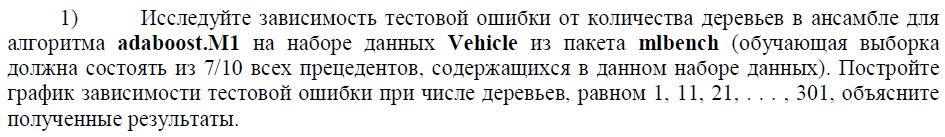

In [14]:
data = pd.read_csv('vehicle_csv.csv')
data.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [15]:
X, y = data.drop("Class", axis=1), data.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [41]:
tree = DecisionTreeClassifier(max_depth=9)
xs = np.arange(1, 302, 10)
ys = []
for size in xs:
    clf = AdaBoostClassifier(base_estimator=tree, n_estimators=size)
    clf.fit(X_train, y_train)
    ys.append(clf.score(X_test, y_test))
    print(size, clf.score(X_test, y_test))

1 0.7440944881889764
11 0.7716535433070866
21 0.7480314960629921
31 0.7480314960629921
41 0.7480314960629921
51 0.7598425196850394
61 0.7716535433070866
71 0.7874015748031497
81 0.7874015748031497
91 0.7952755905511811
101 0.7795275590551181
111 0.7952755905511811
121 0.7755905511811023
131 0.7952755905511811
141 0.7716535433070866
151 0.7795275590551181
161 0.7834645669291339
171 0.7598425196850394
181 0.7795275590551181
191 0.8110236220472441
201 0.7834645669291339
211 0.7716535433070866
221 0.7834645669291339
231 0.7874015748031497
241 0.7834645669291339
251 0.7874015748031497
261 0.7952755905511811
271 0.7755905511811023
281 0.7952755905511811
291 0.7677165354330708
301 0.7637795275590551


Text(0, 0.5, 'test score')

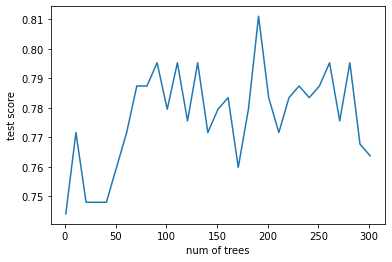

In [42]:
plt.plot(xs, ys)
plt.xlabel("num of trees")
plt.ylabel('test score')

In [40]:
for d in range(1, 11):
    tree = DecisionTreeClassifier(max_depth=d).fit(X_train, y_train)
    print(d, tree.score(X_test, y_test))

1 0.36220472440944884
2 0.5511811023622047
3 0.7165354330708661
4 0.7204724409448819
5 0.7125984251968503
6 0.7244094488188977
7 0.7440944881889764
8 0.7519685039370079
9 0.7637795275590551
10 0.7559055118110236


***ЗАДАНИЕ 2***

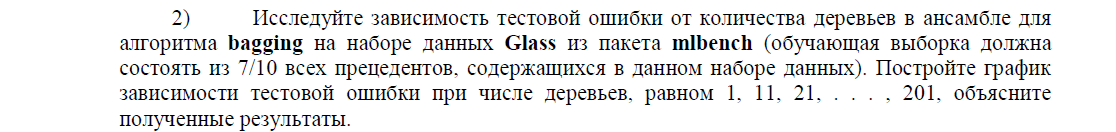

In [60]:
data = pd.read_csv('glass.data', header=None)
data = data.drop(0, axis=1)
data.head()

,1,2,3,4,5,6,7,8,9,10
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [61]:
X, y = data.drop(10, axis=1), data[10]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [65]:
tree = DecisionTreeClassifier(max_depth=7)
xs = np.arange(1, 202, 10)
ys = []
for size in xs:
    clf = BaggingClassifier(n_estimators=size, bootstrap_features=True)  # (base_estimator=tree, n_estimators=size, bootstrap_features=True)
    clf.fit(X_train, y_train)
    ys.append(clf.score(X_test, y_test))
    print(size, clf.score(X_test, y_test))

1 0.6923076923076923
11 0.8
21 0.7384615384615385
31 0.7384615384615385
41 0.7692307692307693
51 0.7230769230769231
61 0.7846153846153846
71 0.7230769230769231
81 0.8153846153846154
91 0.7846153846153846
101 0.7846153846153846
111 0.7692307692307693
121 0.8
131 0.8
141 0.7846153846153846
151 0.7846153846153846
161 0.7846153846153846
171 0.7692307692307693
181 0.7384615384615385
191 0.7692307692307693
201 0.7384615384615385


Text(0, 0.5, 'test score')

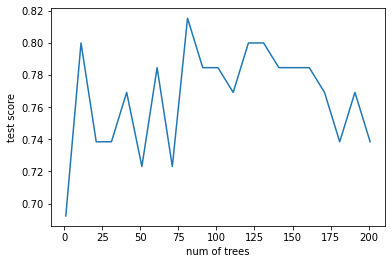

In [66]:
plt.plot(xs, ys)
plt.xlabel("num of trees")
plt.ylabel('test score')

In [62]:
for d in range(1, 11):
    tree = DecisionTreeClassifier(max_depth=d).fit(X_train, y_train)
    print(d, tree.score(X_test, y_test))

1 0.5076923076923077
2 0.6307692307692307
3 0.676923076923077
4 0.676923076923077
5 0.6923076923076923
6 0.6461538461538462
7 0.7076923076923077
8 0.6307692307692307
9 0.676923076923077
10 0.6615384615384615


***ЗАДАНИЕ 3***

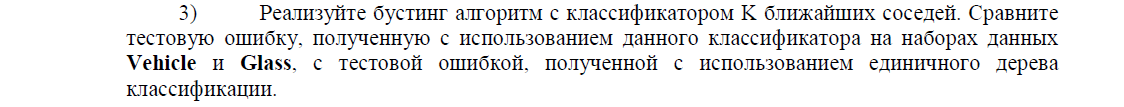

*К сожалению, sklearn не позволяет сделать AdaBoostClassifier из KNeighborsClassifier, поэтому применим градиентный бустинг*

In [95]:
def pipeline(ds_name, target, subsample_range, drop=None, encode=False, no_header=False, nn=3, n_est=[100], do_norm = True):
    if no_header:
        data = pd.read_csv(ds_name, header=None)
    else:
        data = pd.read_csv(ds_name)
    if not (drop is None):
        data = data.drop(drop, axis=1)
    X = data.drop(target, axis=1)
    if encode: 
        y = LabelEncoder().fit_transform(data[target])
    else:
        y = data[target]
    if do_norm:
        X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
    knn = KNeighborsClassifier(n_neighbors=nn)
    clf = GradientBoostingClassifier(init=knn)
    gs = RandomizedSearchCV(clf, {'subsample': subsample_range, 'n_estimators': n_est}, n_jobs=-1)
    gs.fit(X_train, y_train)
    print(gs.best_estimator_.score(X_test, y_test))
    print(gs.best_estimator_)

In [92]:
pipeline('vehicle_csv.csv', 'Class', np.arange(0.1, 0.91, 0.1), encode=True, nn=5, n_est=range(100, 300, 20))

0.7874015748031497
GradientBoostingClassifier(init=KNeighborsClassifier(), n_estimators=160,
                           subsample=0.4)


In [97]:
pipeline('glass.data', 10, [min(i, 1) for i in np.arange(0.6, 1.001, 0.05)],
         drop=0, no_header=True, nn=5, n_est=range(100, 300, 10), do_norm=False) 

0.8153846153846154
GradientBoostingClassifier(init=KNeighborsClassifier(), n_estimators=280,
                           subsample=0.7500000000000001)
